# SENTIMENT  ANALYSIS ON FOOD REVIEWS 


In [50]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
#importing data csv file 
review = pd.read_csv('Reviews.csv')
review.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [52]:
# number of  reviews 
print('The number of entries in the data frame: ', review.shape[0])

The number of entries in the data frame:  568454


In [53]:
# no . of  food items ids
review['ProductId'].nunique()

74258

In [54]:
# no . of user ids  unique
review['UserId'].nunique()

256059

In [55]:
#blank spaces , unkown data 
review.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [56]:
review = review.drop(['ProductId','UserId','ProfileName','Id','HelpfulnessNumerator','HelpfulnessDenominator','Time','Summary'], axis=1)

In [57]:
review.isnull().sum()

Score    0
Text     0
dtype: int64

In [58]:
review=review[review.Score !=3]

In [59]:
review.head()

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


In [60]:
def f(r):
    if r > 3 :
        return 1
    else:
        return 0

In [61]:
review['sentiment']=review.Score.map(f)

In [62]:
review.head()

,Score,Text,sentiment
0,5,I have bought several of the Vitality canned d...,1
1,1,Product arrived labeled as Jumbo Salted Peanut...,0
2,4,This is a confection that has been around a fe...,1
3,2,If you are looking for the secret ingredient i...,0
4,5,Great taffy at a great price. There was a wid...,1


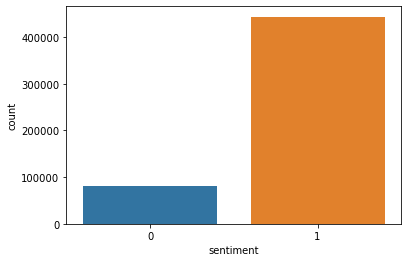

In [63]:
# plotting  the sentiment score 
sns.countplot(review['sentiment'])
plt.show()

In [64]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [65]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

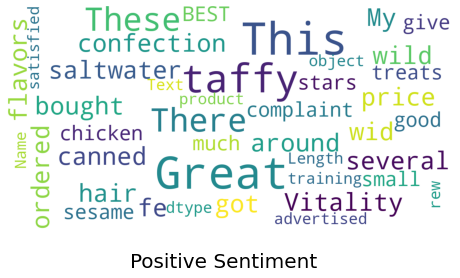

In [66]:
show_wordcloud(review[review.sentiment == 1]['Text'], title = "Positive Sentiment")

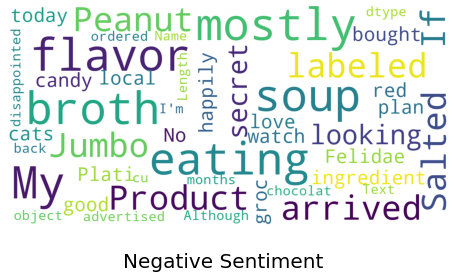

In [67]:
show_wordcloud(review[review.sentiment == 0]['Text'], title = "Negative Sentiment")

In [68]:
#splitting data into train and test data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(review['Text'], review['sentiment'], test_size=0.3,random_state =100)

In [69]:
# converting  text data into vector format  using bigrams 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = CountVectorizer(ngram_range = (1,2)).fit(X_train)
X_train_vectorized = vect.transform(X_train)
len(vect.get_feature_names())

2405849

In [70]:
feat = vect.get_feature_names()

# Logistic Regression

In [71]:
# the number of features has increased again
# checking for the AUC
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [72]:
predictions = model.predict(vect.transform(X_test))

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9651209230086532

accuracy score is 96.7 %

In [74]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc = roc_auc_score(y_test, predictions)
print('AUC: ', roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, predictions)

AUC:  0.9252538440450103


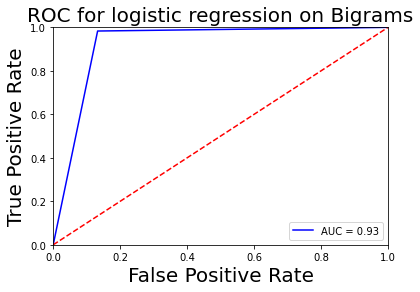

In [75]:
plt.title('ROC for logistic regression on Bigrams', fontsize=20)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize = 20)
plt.xlabel('False Positive Rate', fontsize = 20)
plt.show()

In [76]:
new_review = ['The food is not good, I would never buy them again']
print(model.predict(vect.transform(new_review)))

[0]


In [77]:
new_review1 = ["One wouldn't be disappointed by the food"]
print(model.predict(vect.transform(new_review1)))

[1]


In [78]:
new_review2 = ["the food is not bad, i will buy them again"]
print(model.predict(vect.transform(new_review2)))

[1]


In [79]:
new_review3 = ["I LIKE SWEETS"]


In [80]:
print(model.predict(vect.transform(new_review3)))

[1]


In [81]:
new_review4 = ["food taste is delicious"]

In [82]:
print(model.predict(vect.transform(new_review4)))

[1]


In [83]:
new_review5 = [" food taste is very bad"]

In [84]:
print(model.predict(vect.transform(new_review5)))

[0]


# DONE